## CenturyLink

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    bucket_and_bin, 
    speed_breakdown, 
    unserved
)

In [3]:
# inputs
fn_centurylink = '../data/output/speed_price_centurylink.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_cl.csv'

In [4]:
cl = pd.read_csv(fn_centurylink, compression='gzip')
len(cl)

/home/chino/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


186611

In [5]:
cl.major_city.nunique()

15

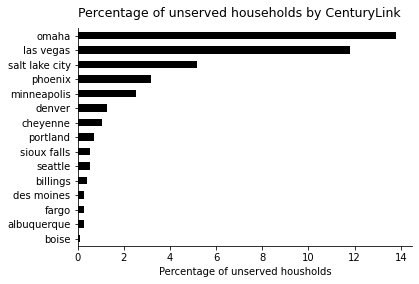

In [6]:
unserved(cl, isp='CenturyLink', height=4)

In [7]:
cl = cl[cl.price != 65]
cl = cl[cl.speed_down != 0]
len(cl)

180067

In [8]:
cl = bucket_and_bin(cl)

In [9]:
# cost per Mbps?
50 / cl.speed_down.describe()

count      0.000278
mean       0.512946
std        0.622787
min      100.000000
25%        3.333333
50%        0.625000
75%        0.250000
max        0.250000
Name: speed_down, dtype: float64

In [10]:
# who has options?
cl[(cl['speed_down'] != cl['fastest_speed_down']) &
   (~cl['fastest_speed_down'].isnull())]['speed_down_bins'].value_counts(normalize=True)

Blazing (>200)     0.999984
Slow (<25 Mbps)    0.000016
No service         0.000000
Medium (25-100)    0.000000
Fast (100-200)     0.000000
Name: speed_down_bins, dtype: float64

In [11]:
variety = cl.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
homogenous_cities = variety[variety >= .95].index.get_level_values(0)
len(homogenous_cities)

0

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


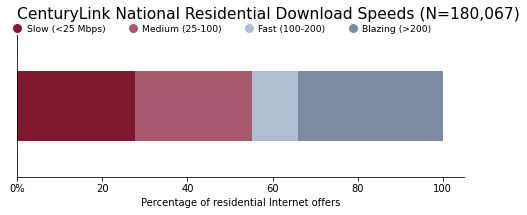

In [12]:
speed_breakdown(cl, isp='CenturyLink')

In [13]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in cl.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


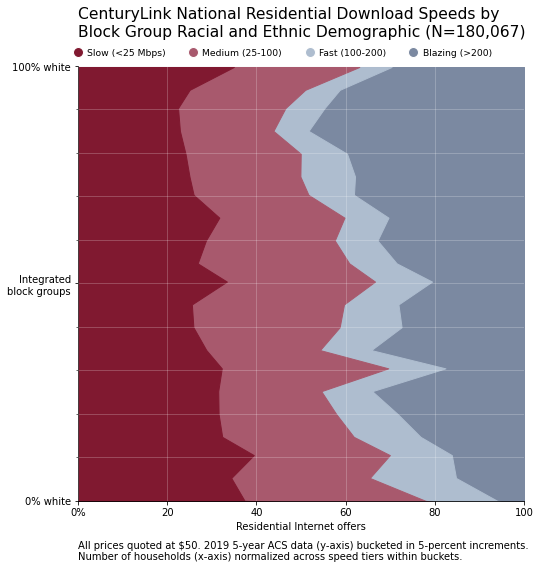

In [14]:
plot_race(cl, isp='CenturyLink', price="$50")

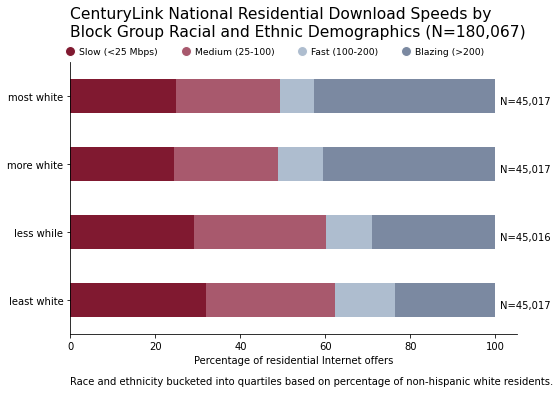

In [15]:
race(cl, isp='CenturyLink')

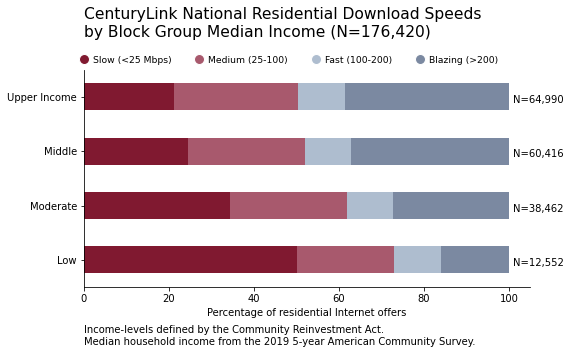

In [16]:
income(cl, isp='CenturyLink')

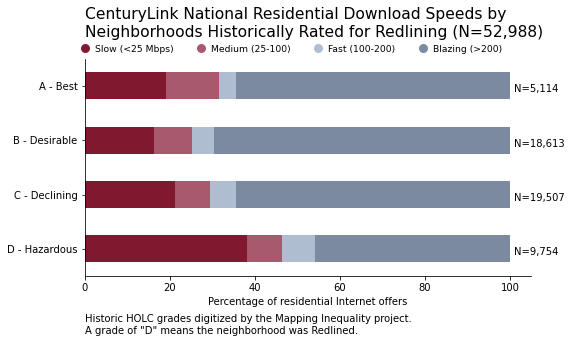

In [17]:
redlining(cl, isp='CenturyLink')

## Each City

albuquerque


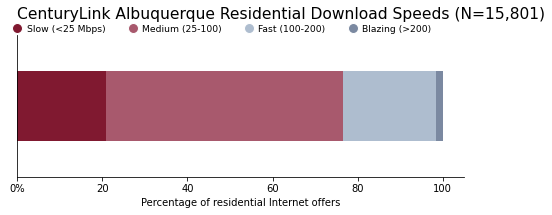

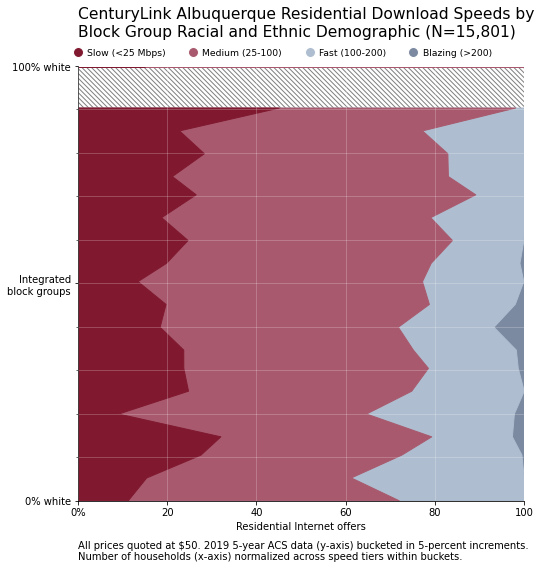

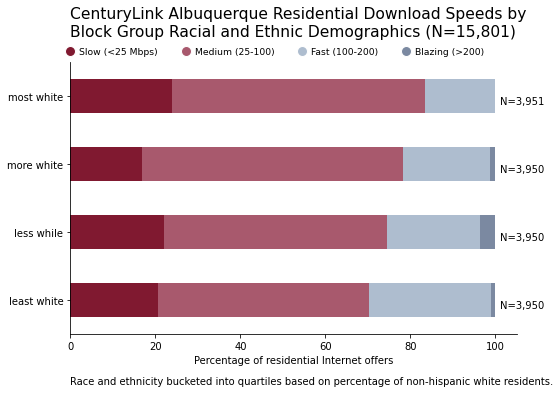

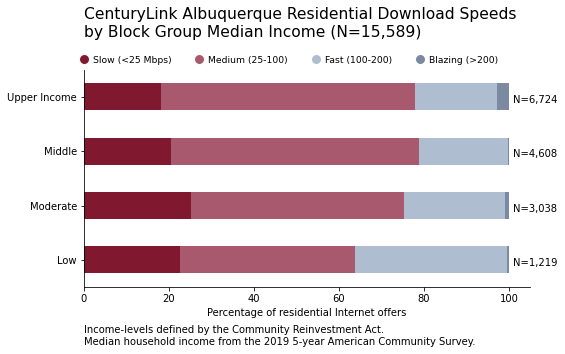

*******************************************************************************
billings


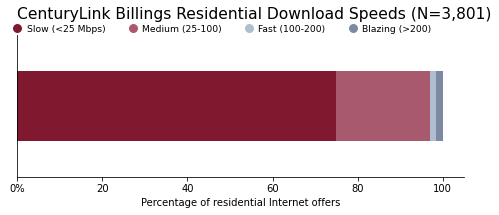

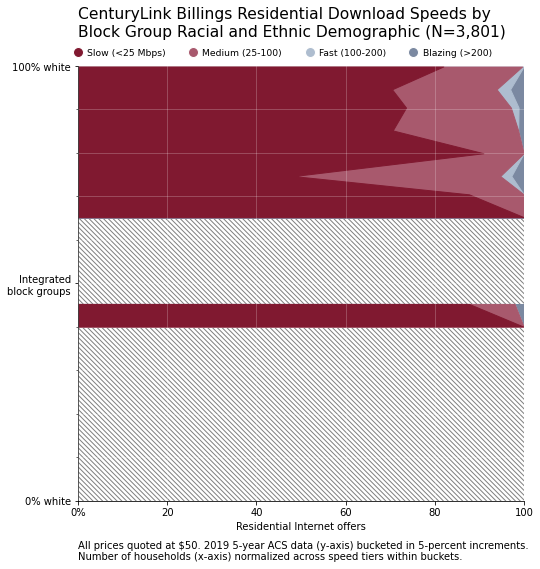

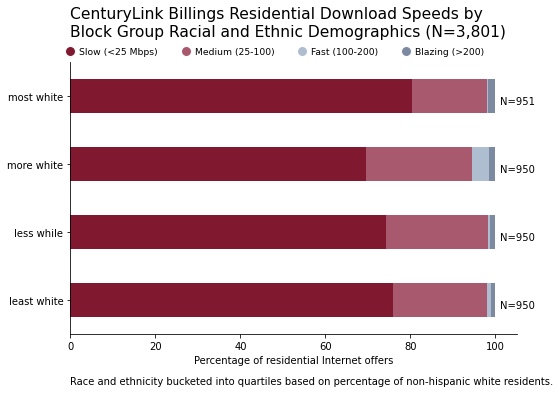

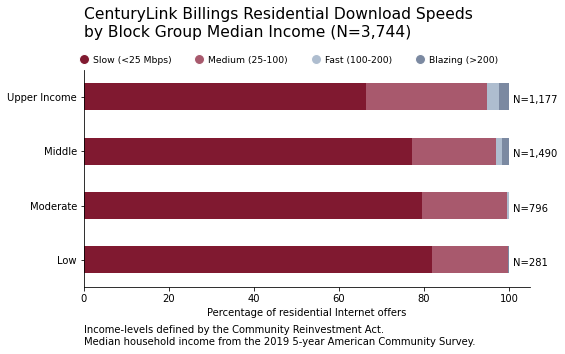

*******************************************************************************
boise


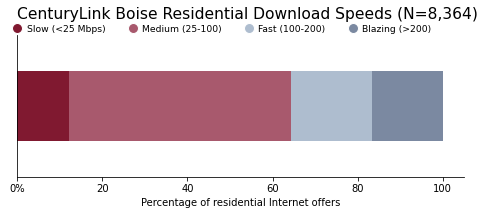

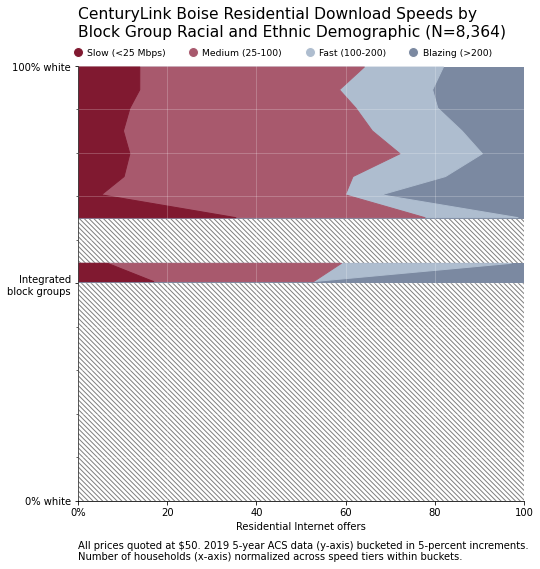

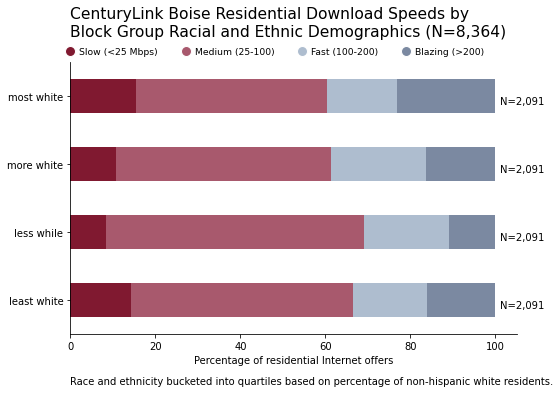

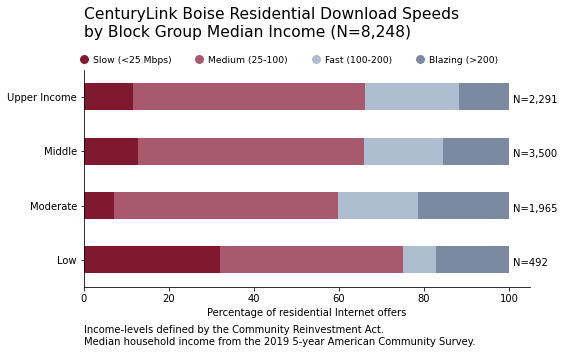

*******************************************************************************
cheyenne


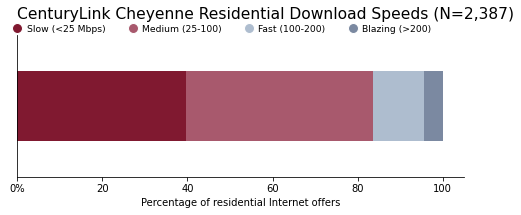

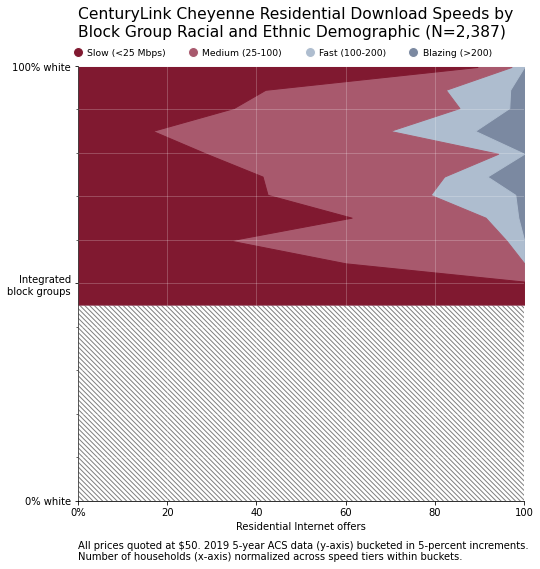

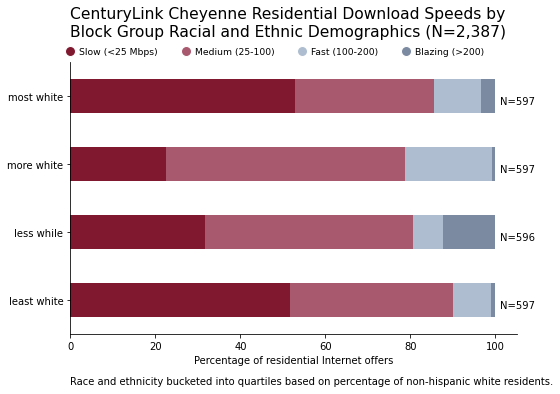

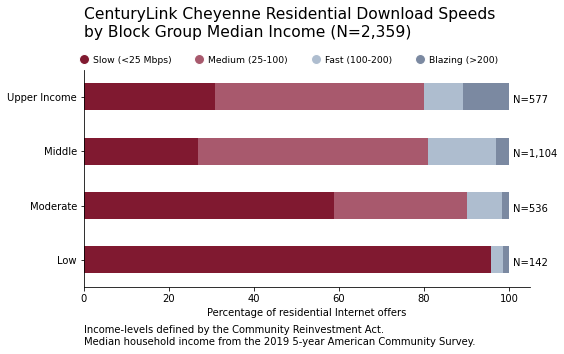

*******************************************************************************
denver


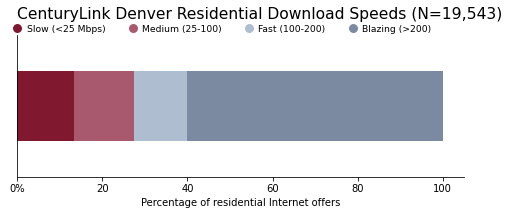

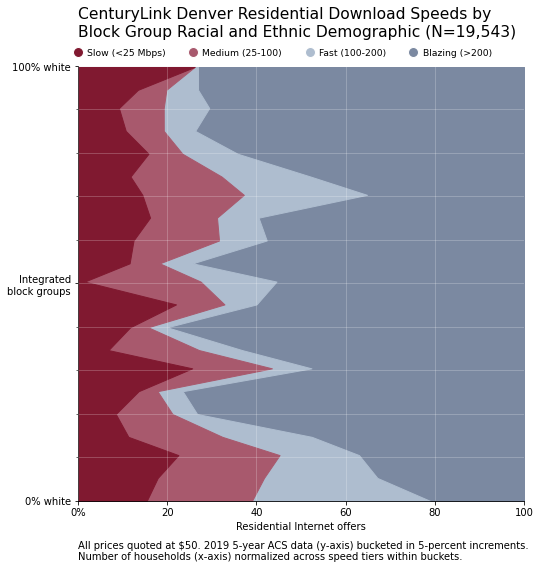

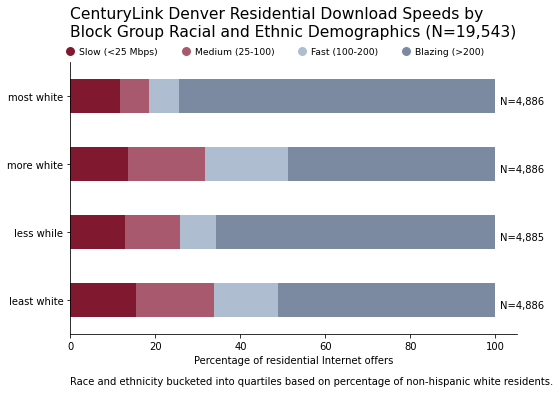

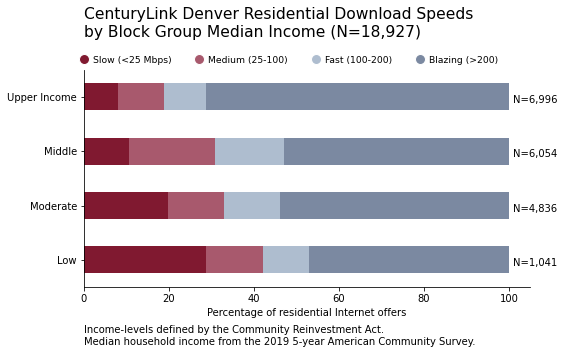

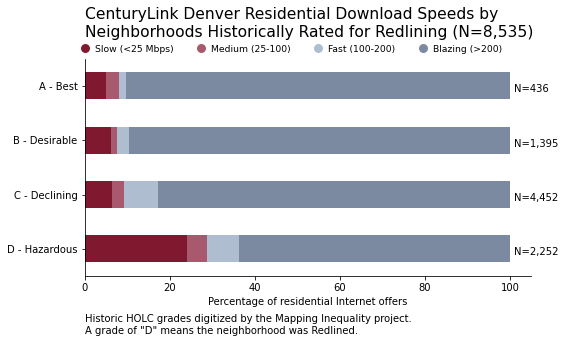

*******************************************************************************
des moines


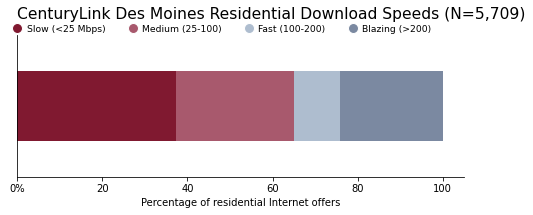

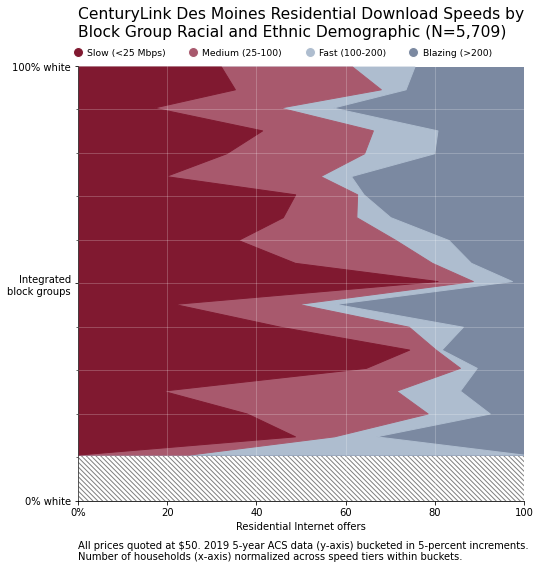

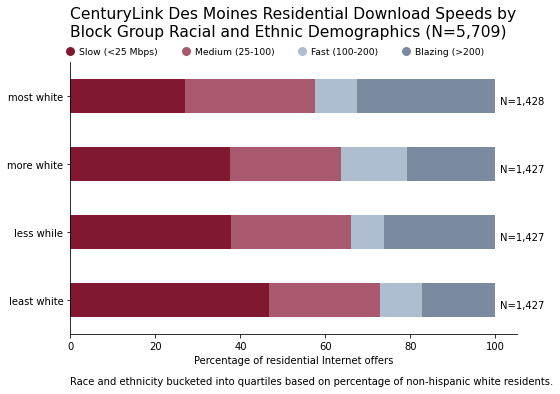

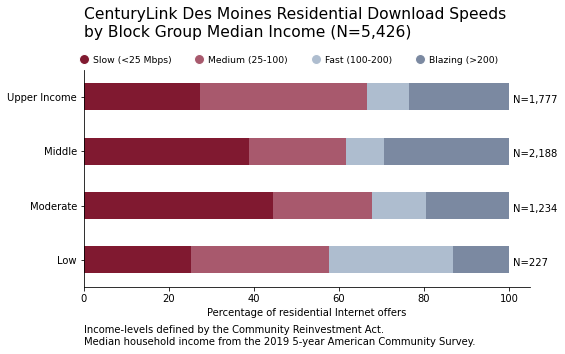

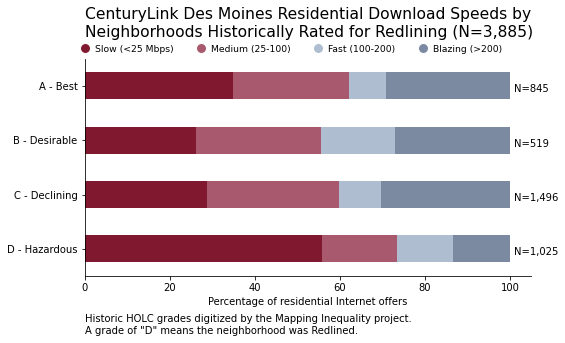

*******************************************************************************
fargo


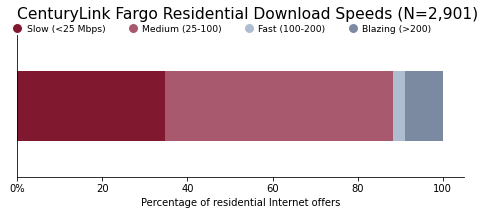

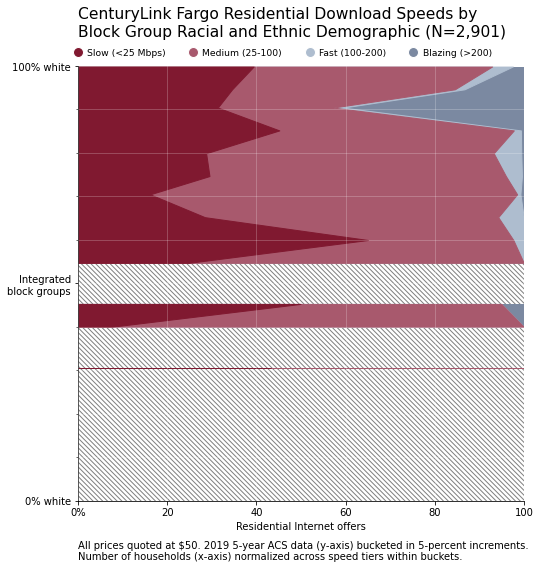

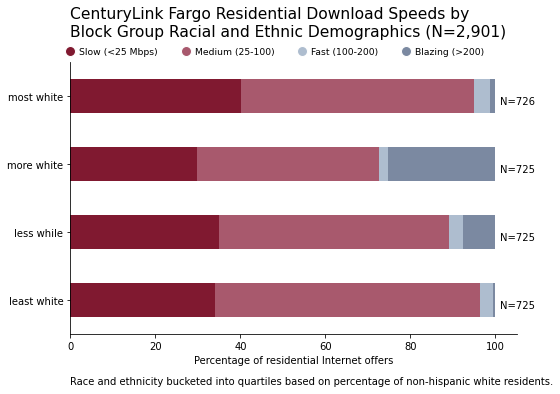

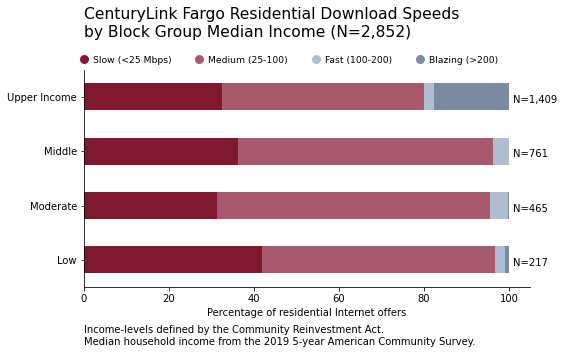

*******************************************************************************
las vegas


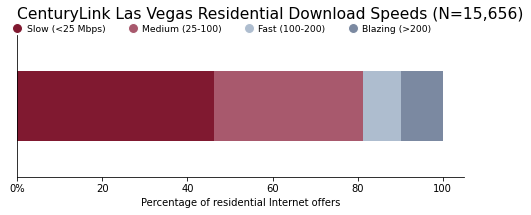

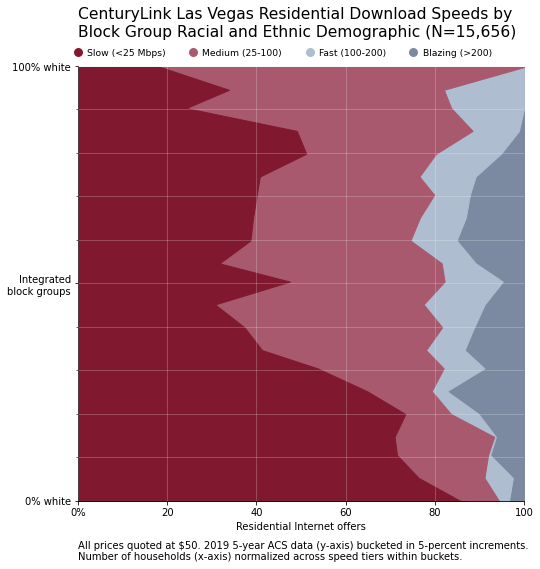

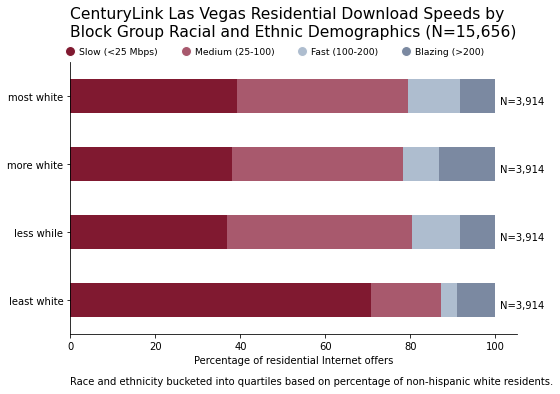

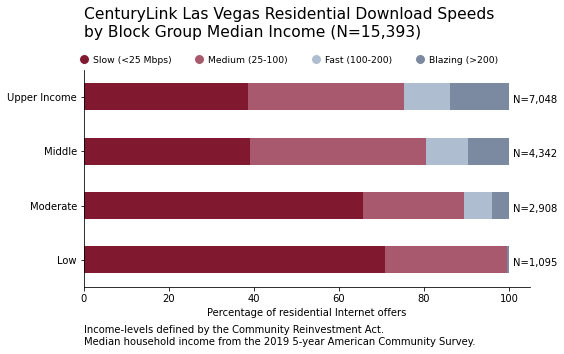

*******************************************************************************
minneapolis


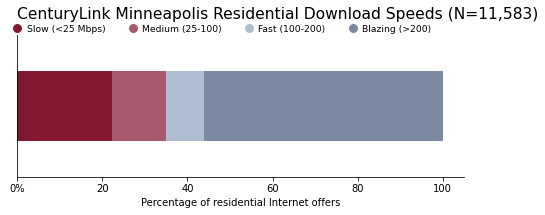

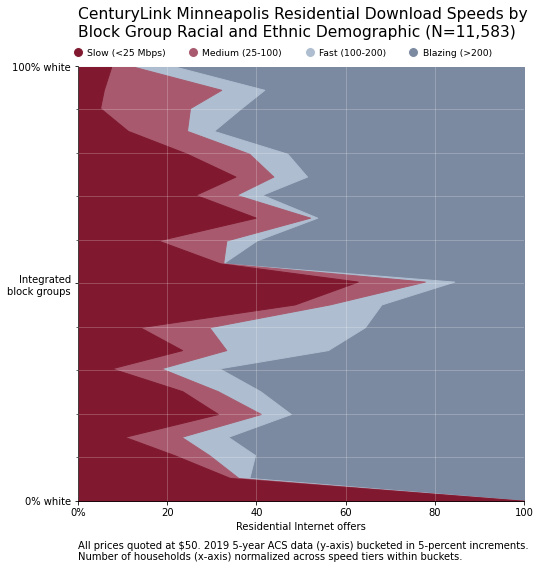

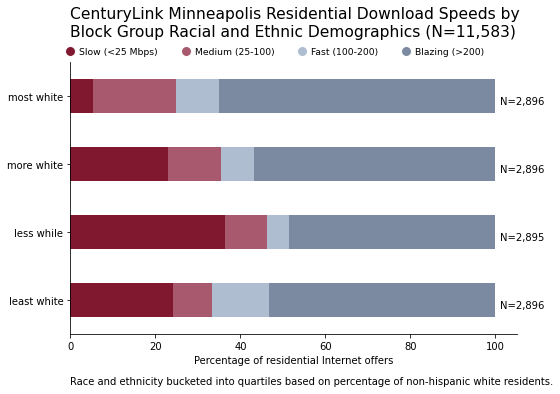

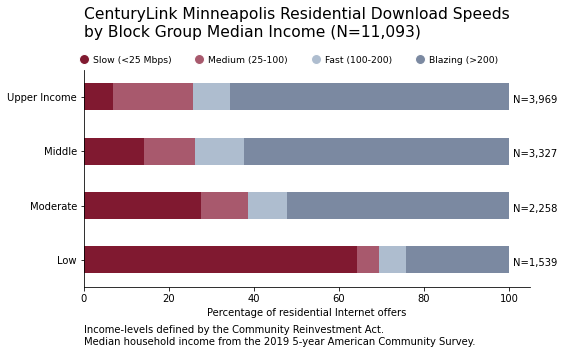

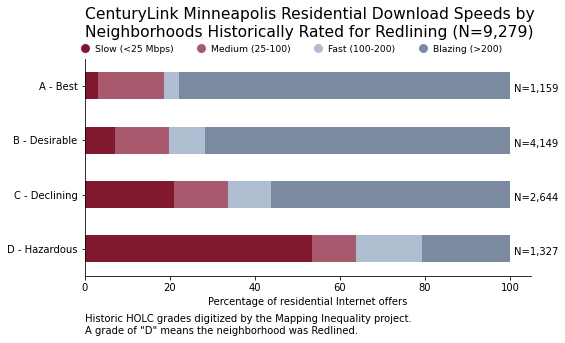

*******************************************************************************
omaha


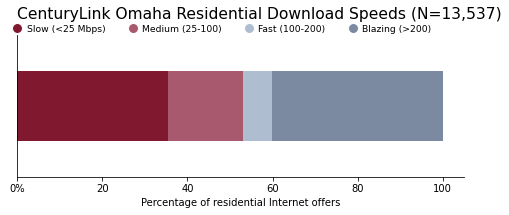

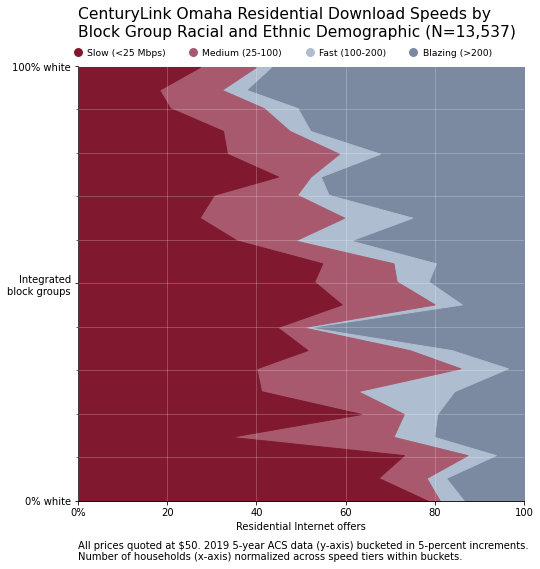

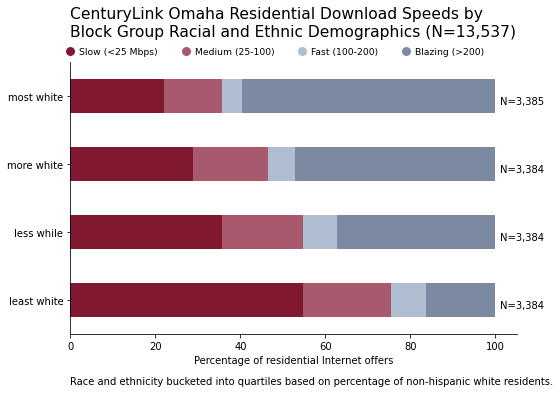

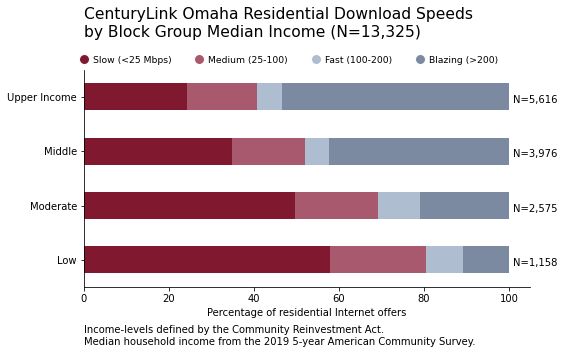

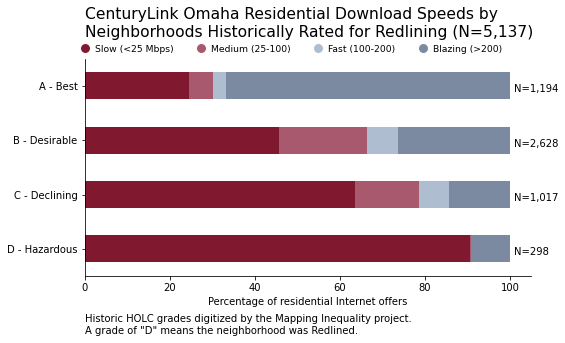

*******************************************************************************
phoenix


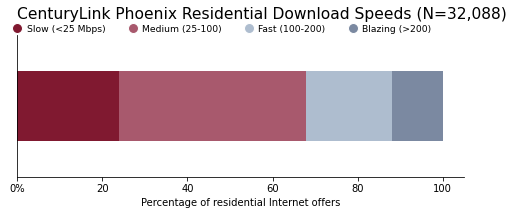

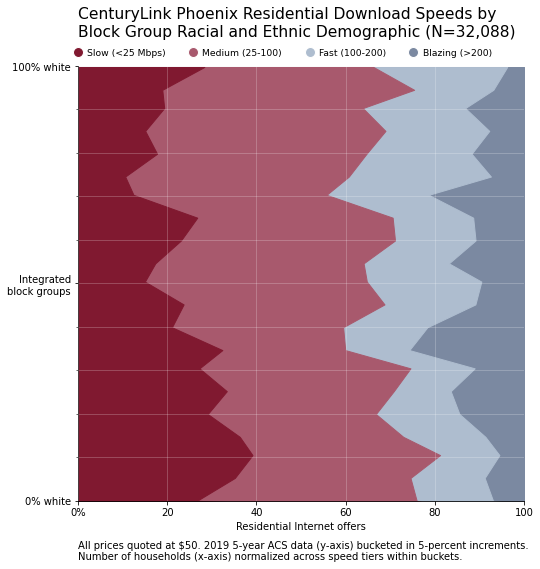

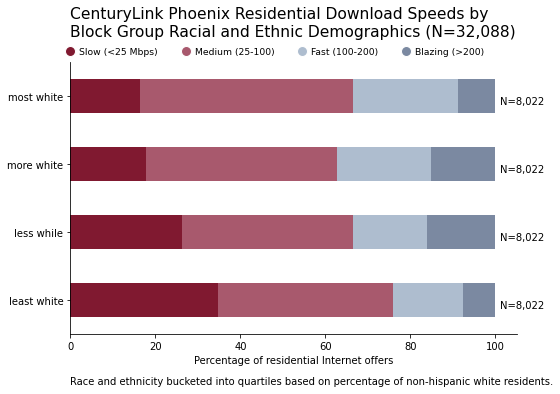

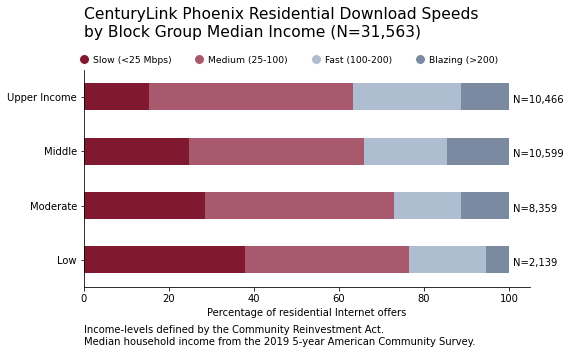

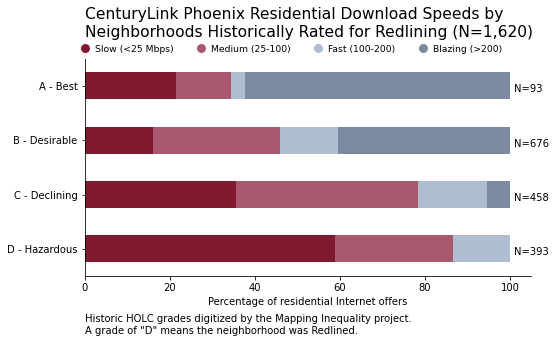

*******************************************************************************
portland


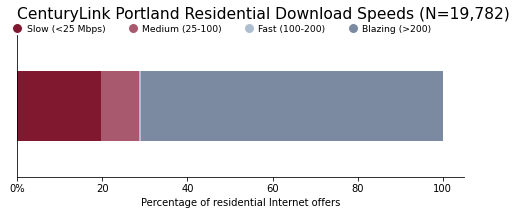

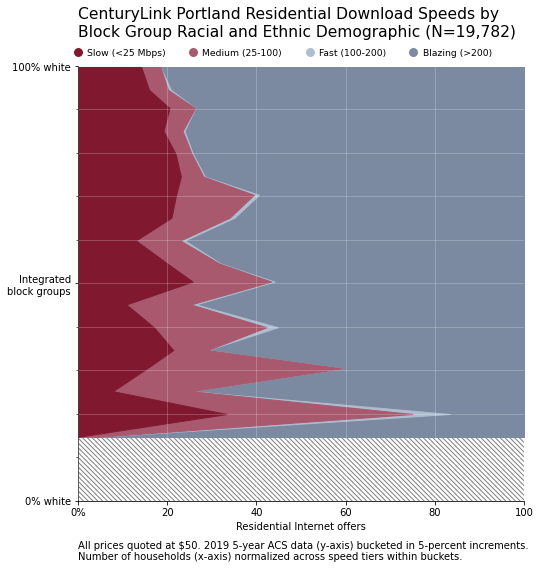

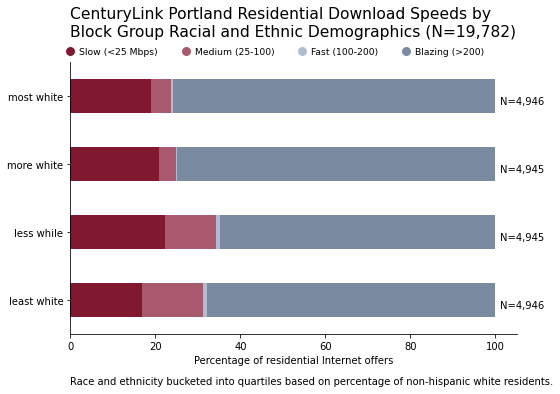

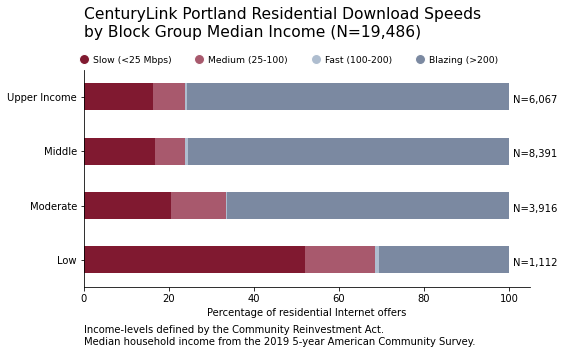

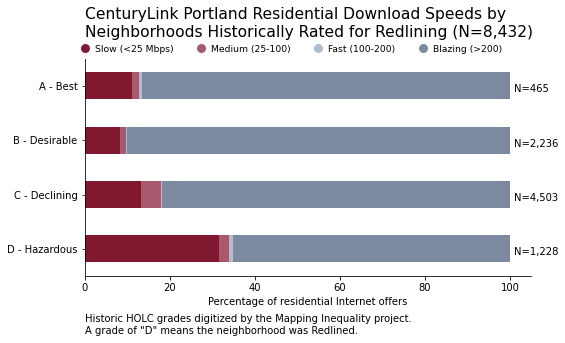

*******************************************************************************
salt lake city


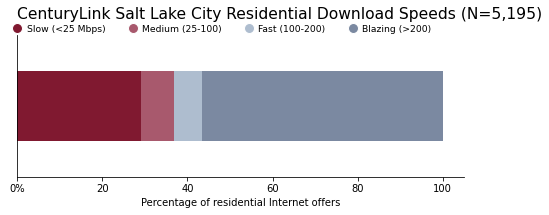

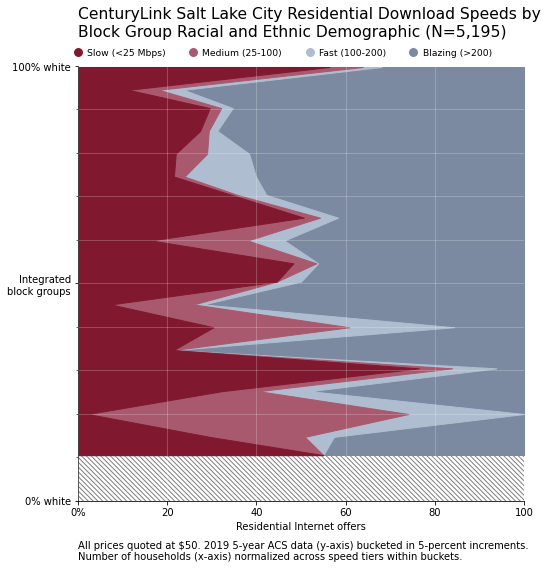

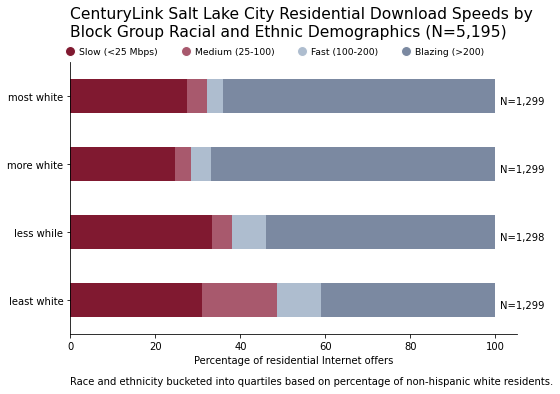

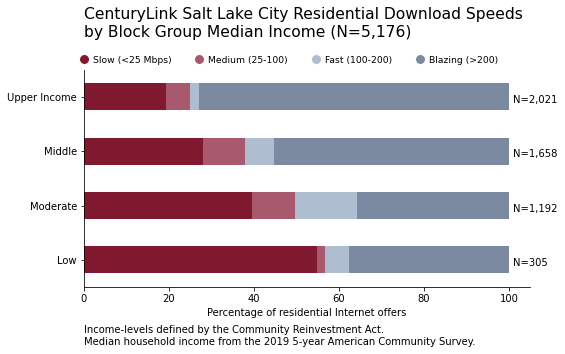

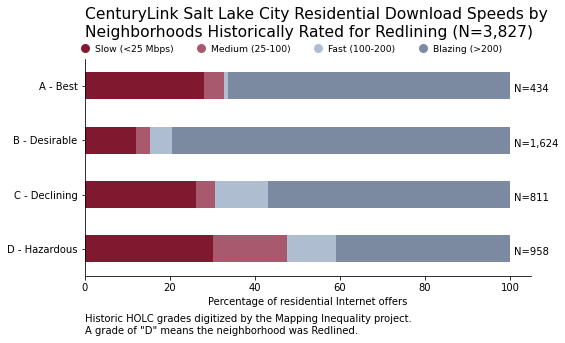

*******************************************************************************
seattle


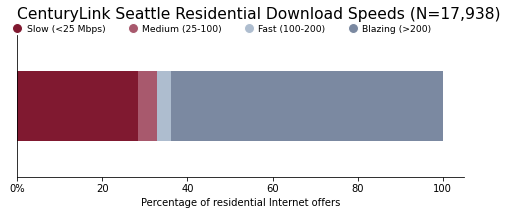

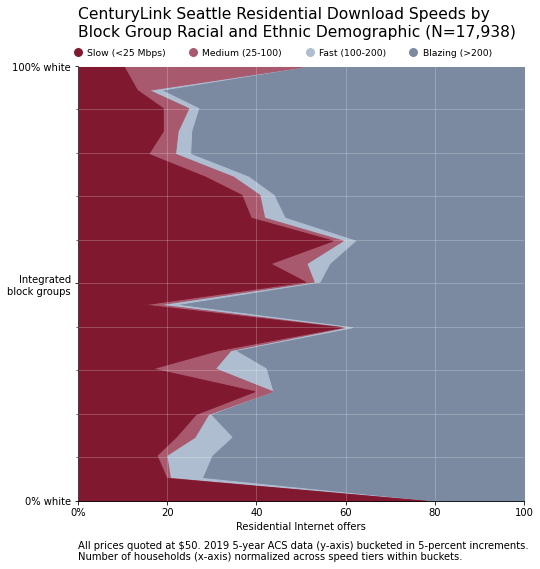

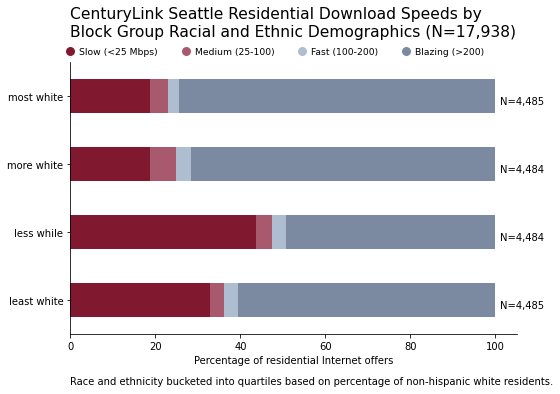

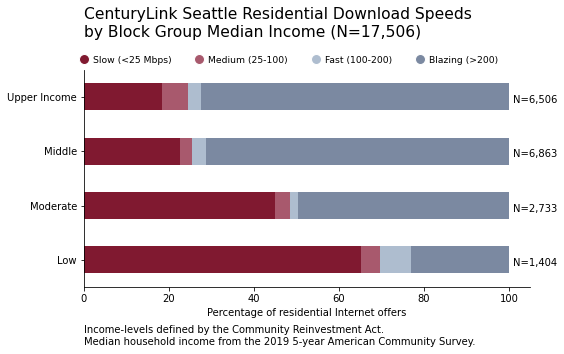

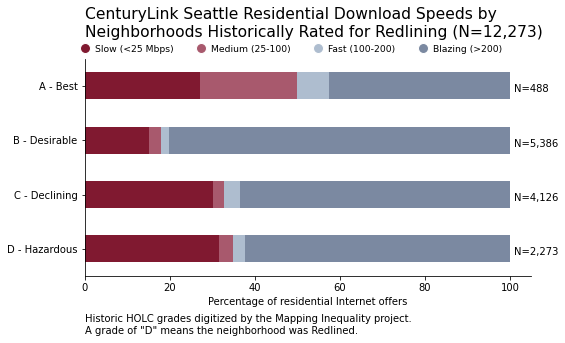

*******************************************************************************
sioux falls


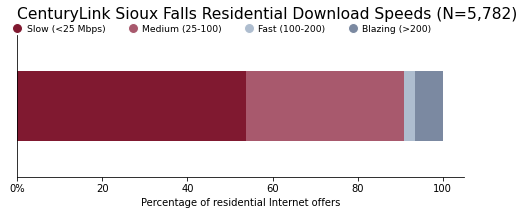

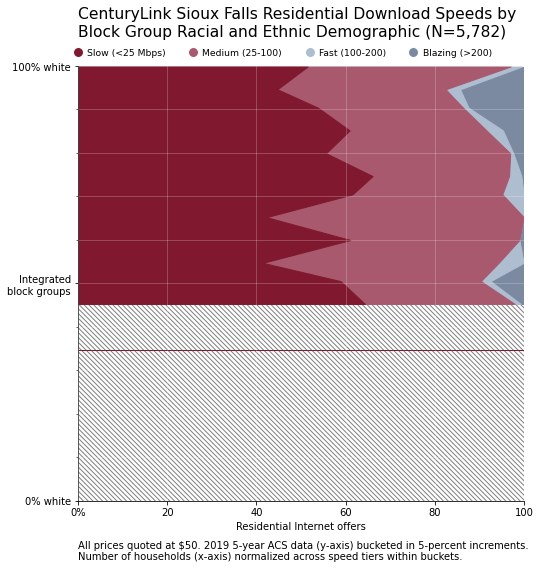

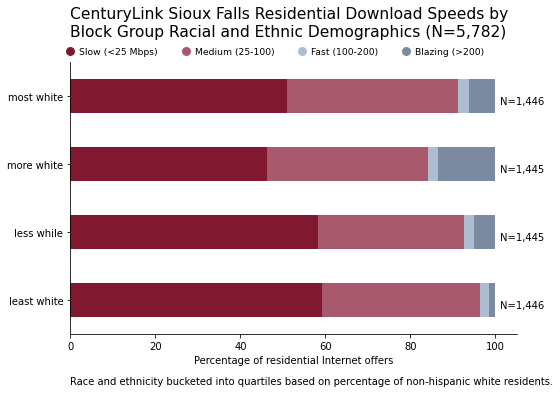

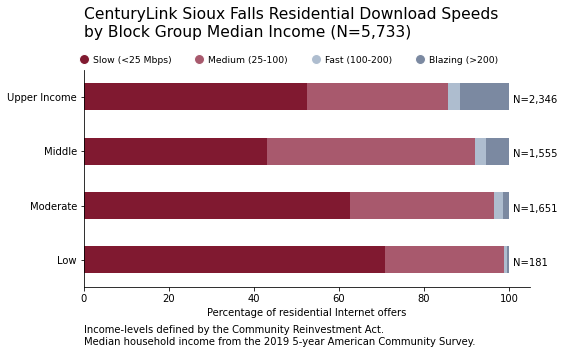

*******************************************************************************


In [18]:
for city, _df in cl.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title(), isp='CenturyLink')
    plot_race(_df, location=city.title(), isp='CenturyLink', price='$50')
    race(_df, location=city.title(), isp='CenturyLink')
    income(_df, location=city.title(), isp='CenturyLink')
    redlining(_df, location=city.title(), isp='CenturyLink')
    print("*" * 79)